In [1]:
import numpy as np
import scipy
from matplotlib.pyplot import *
from numpy import *
from scipy import stats

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import clear_output, display, HTML

In [3]:
from bvn import BivariateNormal, plot_bvn, plot_new_bvn

In [4]:
ion()

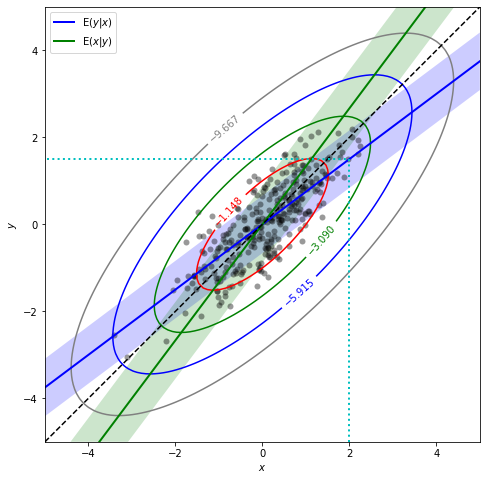

In [5]:
fig = figure(figsize=(8,8))
ax = axes()  # adds an axes to current fig
plot_new_bvn(ax, .75, rlines=True, regress=2., samples=300)

In [6]:
def plot_bvn_rho(rho):
    """
    Plot a standard bivariate normal distribution, including contours of its PDF
    and regression lines (with conditional standard deviations).

    This just calls `plot_bvn`, but provides a simpler signature for
    interactive plotting with widget control of `rho`.
    """
    fig = figure(figsize=(8,8))
    ax = axes()
    plot_new_bvn(ax, rho, rlines=True)
    return fig, ax

widget = interactive(plot_bvn_rho, rho=(-.95, .95))
display(widget)

interactive(children=(FloatSlider(value=0.0, description='rho', max=0.95, min=-0.95), Output()), _dom_classes=…

In [7]:
bvn = BivariateNormal([0,0], [1,1], .7)
xyvals = bvn.sample(1000)

Text(0.5, 0, 'Counts')

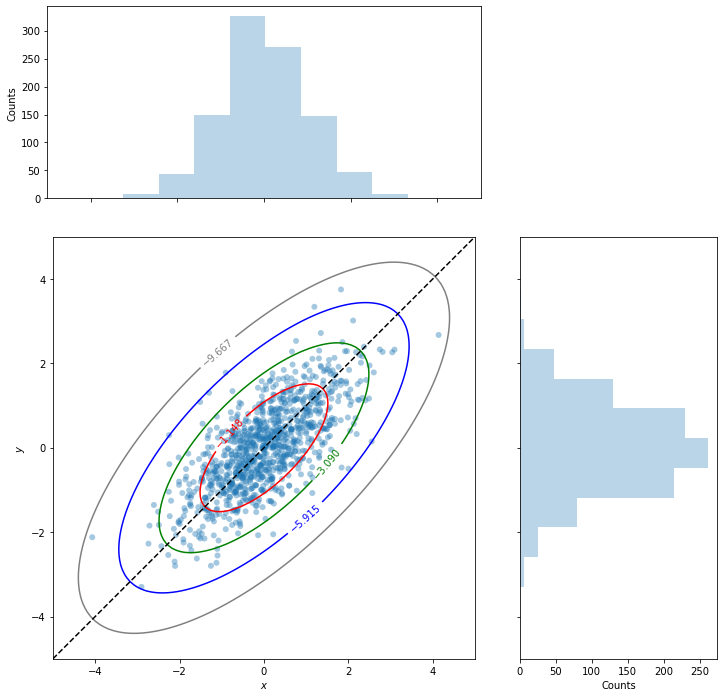

In [8]:
fig = figure(figsize=(12,12))

# Use mpl's GridSpec capability, via the subplot2grid() helper function,
# to put axes in the figure; see: http://matplotlib.org/users/gridspec.html
# Use the sharex, sharey arguments to link axes.
xy_ax = subplot2grid((3,3), (1,0), colspan=2, rowspan=2)
x_ax = subplot2grid((3,3), (0,0), colspan=2, sharex=xy_ax)
y_ax = subplot2grid((3,3), (1,2), rowspan=2, sharey=xy_ax)

setp(x_ax.get_xticklabels(), visible=False)  # hide x labels on top axes
setp(y_ax.get_yticklabels(), visible=False)  # hide y labels on right axes

# Plot the samples in xyvals as a scatterplot.
xy_ax.scatter(xyvals[:,0], xyvals[:,1], edgecolors='none', alpha=0.4)  # scatter plot in x,y axes

# Plot contours of the joint PDF.
plot_bvn(xy_ax, bvn)

# Plot histograms in the margins.
x_ax.hist(xyvals[:,0], alpha=.3)  # x histo on top
y_ax.hist(xyvals[:,1], orientation='horizontal', alpha=.3)  # y histo on side

# Label axes!
xy_ax.set_xlabel('$x$')
xy_ax.set_ylabel('$y$')
x_ax.set_ylabel('Counts')
y_ax.set_xlabel('Counts')